# PROYECTO - Optimización Financiera y Marketing (Showz)
Por Inti Alberto Romero González

## Introducción

El objetivo de este análisis es evaluar el comportamiento de los usuarios del servicio Showz,
analizar el rendimiento de las ventas y evaluar la efectividad de las inversiones en marketing,
con el fin de optimizar el presupuesto de adquisición de clientes.

## Preparación de datos

In [1]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
visits = pd.read_csv('/datasets/visits_log_us.csv')
orders = pd.read_csv('/datasets/orders_log_us.csv')
costs = pd.read_csv('/datasets/costs_us.csv')

In [2]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [3]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [4]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [5]:
print("=== INFORMACIÓN DE VISITS ===")
print(visits.info())
print("\n=== INFORMACIÓN DE ORDERS ===")
print(orders.info())
print("\n=== INFORMACIÓN DE COSTS ===")
print(costs.info())

=== INFORMACIÓN DE VISITS ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None

=== INFORMACIÓN DE ORDERS ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None

=== INFORMACIÓN DE COSTS ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns

In [6]:
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])
visits['End Ts'] = pd.to_datetime(visits['End Ts'])

orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])

costs['dt'] = pd.to_datetime(costs['dt'])

- **No hay nulos** críticos / se mantienen
- Tipos de datos **corregidos**

## Análisis de Visitas

### Análisis DAU, WAU y MAU

In [7]:
# Usuarios diarios, semanales y mensuales
visits['date'] = visits['Start Ts'].dt.date
visits['week'] = visits['Start Ts'].dt.to_period('W').apply(lambda r: r.start_time)
visits['month'] = visits['Start Ts'].dt.to_period('M').apply(lambda r: r.start_time)

dau = visits.groupby('date')['Uid'].nunique()
wau = visits.groupby('week')['Uid'].nunique()
mau = visits.groupby('month')['Uid'].nunique()

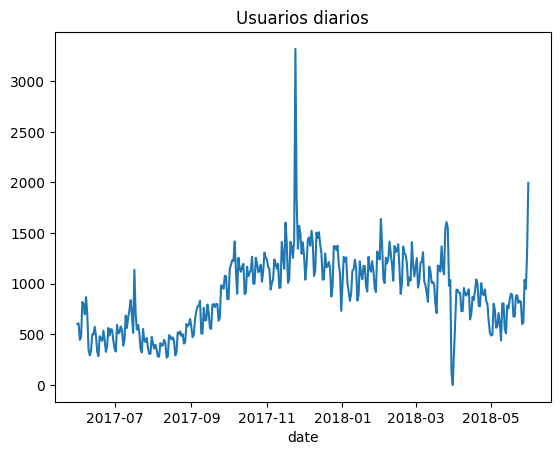

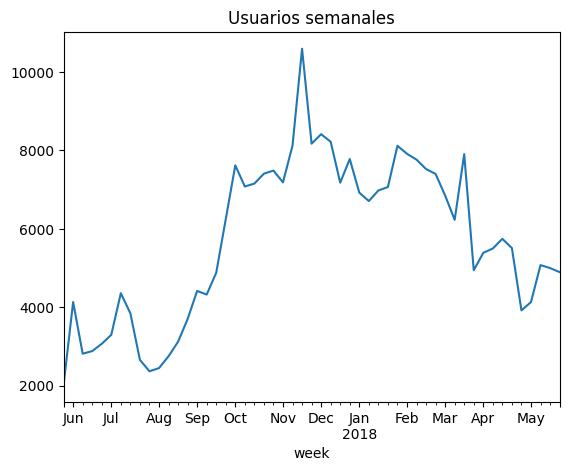

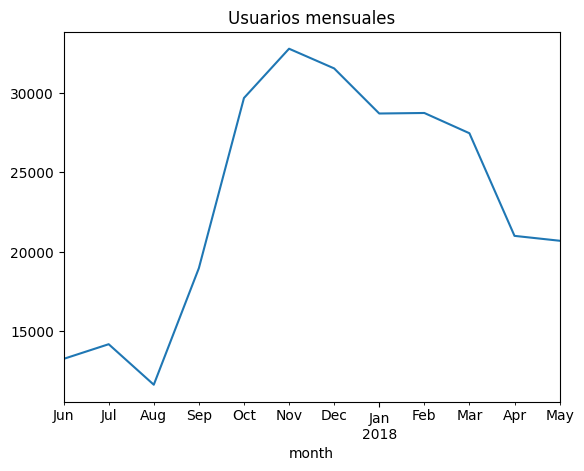

In [8]:
dau.plot(title='Usuarios diarios')
plt.show()

wau.plot(title='Usuarios semanales')
plt.show()

mau.plot(title='Usuarios mensuales')
plt.show()

- Análisis de Usuarios Diarios: Tendencia alcista, los usuarios van creciendo. La variabilidad es alta, los picos y valles sugieren patrones de fin de semana vs días laborales.

- Análisis de Usuarios Semanales: Tendencia más clara, se ve mejor el crecimiento. Pico en diciembre.

- Análisis de Usuarios Mensuales: Patron estacional claro, Oct-Dic alto, Fed bajo. Crecimiento sostenido hasta el pico navideño.

### Sesiones por día

In [9]:
# Contar sesiones por usuario por día
sessions_per_user_per_day = visits.groupby(['date', 'Uid']).size()
print("Sesiones por usuario por día (primeras 10):")
print(sessions_per_user_per_day.head(10))

Sesiones por usuario por día (primeras 10):
date        Uid               
2017-06-01  32197920403662046     1
            184148767273119549    2
            254239507810036143    1
            258099436367309303    1
            300776506671194537    1
            321069768889378113    1
            374683301246067167    1
            385619727271643289    1
            397723557959664980    1
            461906529430190072    1
dtype: int64


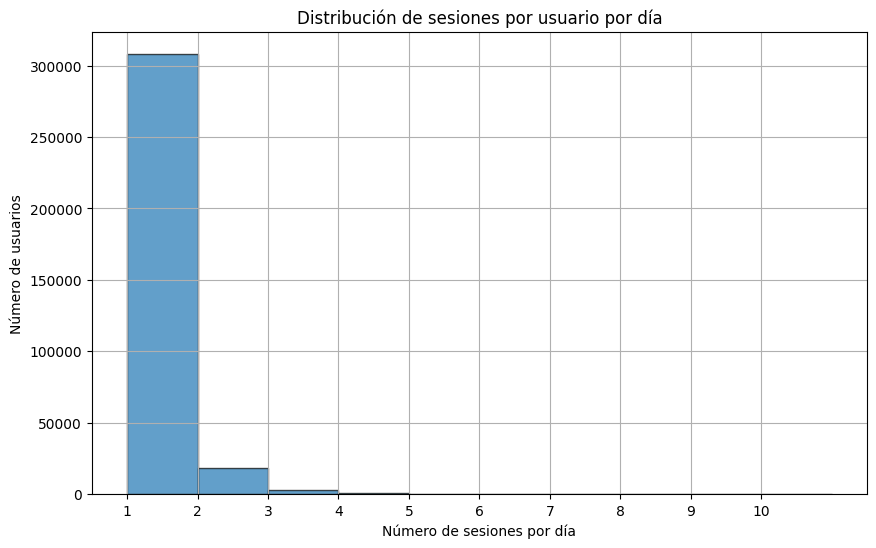

In [10]:
# Crear histograma de distribución de sesiones
plt.figure(figsize=(10, 6))
sessions_per_user_per_day.hist(bins=range(1, sessions_per_user_per_day.max() + 2), 
                               edgecolor='black', alpha=0.7)
plt.xlabel('Número de sesiones por día')
plt.ylabel('Número de usuarios')
plt.title('Distribución de sesiones por usuario por día')
plt.xticks(range(1, sessions_per_user_per_day.max() + 1))
plt.show()

Se presentan más de **300,000 sesiones por día**.

La mayoría de usuarios tiene solo 1 sesión por día lo que indica que usuarios entran al sitio con un propósito específico ya sea **comprar entradas** o **revisar eventos**.

Esto tiene interpretaciones positivas como:
- El sitio web es fácil de usar porque los usuarios encuentran ráido lo que buscan.
- La experiencia de compra es fluida.
- Los usuarios son decisivos en sus compras.

### Duración de cada sesión

In [11]:
visits['session_duration'] = (visits['End Ts'] - visits['Start Ts']).dt.seconds / 60
visits['session_duration'].describe()

count    359400.000000
mean         10.725108
std          16.938913
min           0.000000
25%           2.000000
50%           5.000000
75%          14.000000
max        1408.000000
Name: session_duration, dtype: float64

Observamos la duración de cada sesión:
- Duración promedio: ~10.7 minutos
- Mediana: 5 minutos
- Máximo: 1,408 minutos (¡23 horas!)

Debido a los valores atipicos calculamos el 95% de los datos más comunes para eliminar los valores extremos (outliers) y ver mejor el patrón principal.

In [12]:
# Calcular el percentil 95
percentil_95 = visits['session_duration'].quantile(0.95)
print(f"El 95% de las sesiones duran menos de {percentil_95:.1f} minutos")

El 95% de las sesiones duran menos de 38.0 minutos


In [13]:
# Filtrar el 95% de los datos
sessions_95 = visits[visits['session_duration'] <= percentil_95]['session_duration']
print(f"Sesiones analizadas: {len(sessions_95)} de {len(visits)} total")

Sesiones analizadas: 341701 de 359400 total


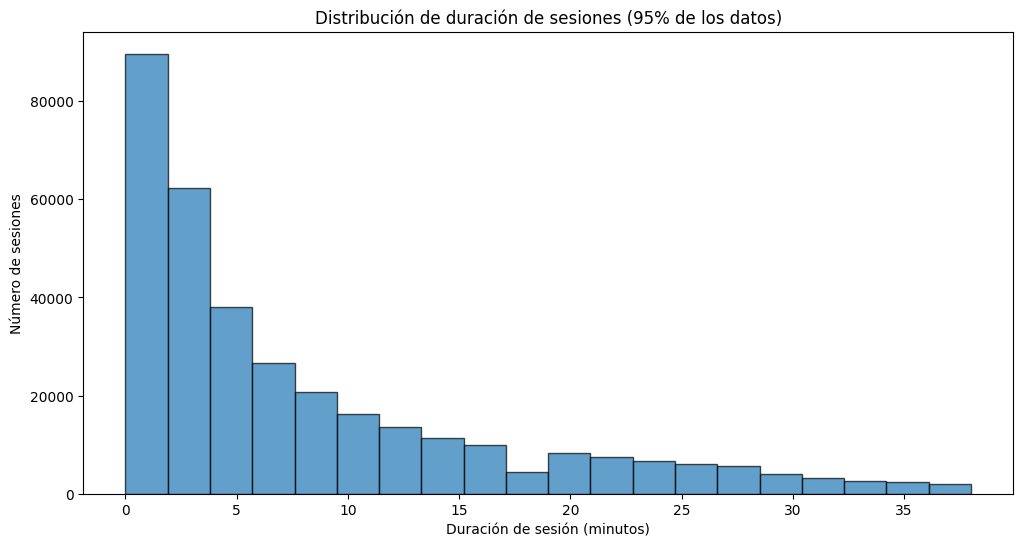

In [14]:
# Crear histograma con el 95% de los datos
plt.figure(figsize=(12, 6))
plt.hist(sessions_95, bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Duración de sesión (minutos)')
plt.ylabel('Número de sesiones')
plt.title('Distribución de duración de sesiones (95% de los datos)')
plt.show()

Interpretación del patrón sesgado a la derecha.
La mayoría de ususarios tienen sesiones cortas y la minoría tiende a sesiones más largas.

### Frecuencia de retorno

In [17]:
# Contar sesiones por usuario
sessions_per_user = visits.groupby('Uid').size()
sessions_per_user.describe()

count    228169.000000
mean          1.575148
std           4.646800
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         893.000000
dtype: float64

In [21]:
# Calcular días únicos de visita por usuario
unique_days_per_user = visits.groupby('Uid')['date'].nunique()
print(unique_days_per_user)

Uid
11863502262781          1
49537067089222          1
297729379853735         1
313578113262317         3
325320750514679         2
                       ..
18446403737806311543    1
18446424184725333426    1
18446556406699109058    1
18446621818809592527    2
18446676030785672386    1
Name: date, Length: 228169, dtype: int64


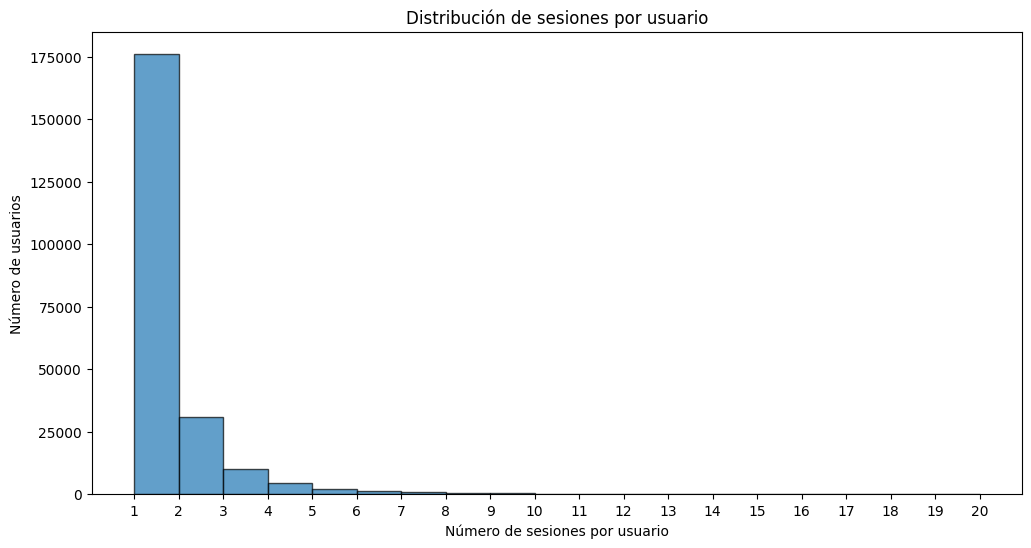

In [22]:
# Visualizar distribución de sesiones por usuario
plt.figure(figsize=(12, 6))
plt.hist(sessions_per_user, bins=range(1, 21), edgecolor='black', alpha=0.7)
plt.xlabel('Número de sesiones por usuario')
plt.ylabel('Número de usuarios')
plt.title('Distribución de sesiones por usuario')
plt.xticks(range(1, 21))
plt.show()

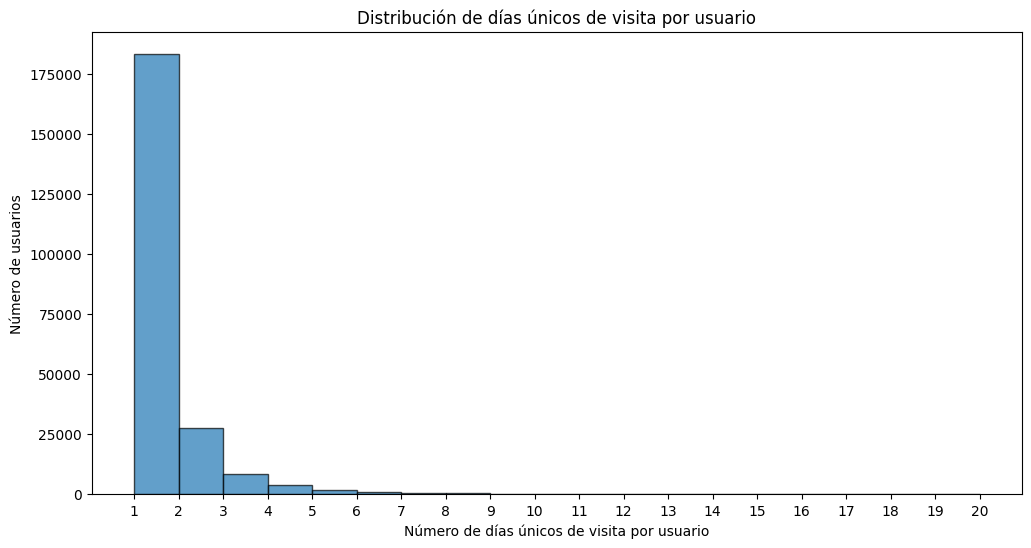

In [25]:
# Visualizar distribución de días únicos por usuario
plt.figure(figsize=(12, 6))
plt.hist(unique_days_per_user, bins=range(1, 21), edgecolor='black', alpha=0.7)
plt.xlabel('Número de días únicos de visita por usuario')
plt.ylabel('Número de usuarios')
plt.title('Distribución de días únicos de visita por usuario')
plt.xticks(range(1, 21))
plt.show()

In [24]:
# Crear tabla de frecuencias
print("=== SESIONES POR USUARIO ===")
print(sessions_per_user.value_counts().head(10).sort_index())
print("\n=== DÍAS ÚNICOS POR USUARIO ===")
print(unique_days_per_user.value_counts().head(10).sort_index())

=== SESIONES POR USUARIO ===
1     176041
2      30926
3      10184
4       4357
5       2283
6       1243
7        807
8        513
9        356
10       239
dtype: int64

=== DÍAS ÚNICOS POR USUARIO ===
1     183124
2      27591
3       8484
4       3706
5       1821
6       1020
7        628
8        383
9        277
10       198
Name: date, dtype: int64


Existe un patron claro donde los usuarios visitan una vez Showz. Esto sugiere que la mayoría de usuarios transaccionales vienen con un proósito específico (comprar entradas) y se van.

**Patrón de usuarios "una vez y ya"**
- 176,041 usuarios (77% del total) tienen solo 1 sesión
- 183,124 usuarios (80%) visitaron solo 1 día

**Usuarios con potencial lealtad**
- Solo 52,128 usuarios (23%) regresaron más de una vez
- 45,045 usuarios (20%) visitaron en múltiples días

## Análisis de ventas

### Tiempo de conversión

In [27]:
first_visit = visits.groupby('Uid')['Start Ts'].min()
first_order = orders.groupby('Uid')['Buy Ts'].min()

conversion = pd.concat([first_visit, first_order], axis=1)
conversion['conversion_days'] = (conversion['Buy Ts'] - conversion['Start Ts']).dt.days

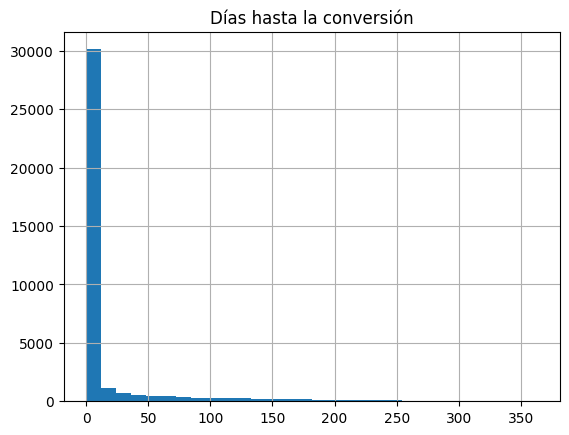

In [28]:
conversion['conversion_days'].hist(bins=30)
plt.title('Días hasta la conversión')
plt.show()

Se muestra una conversión inmediata (día 0). Esto indica que muchos usuarios compran el mismo día que visitan por primera vez. Las barras van disminuyendo conforme pasan los días lo que indica que menos usuarios convierten después de varios días.

In [30]:
# Estadísticas básicas
print(conversion['conversion_days'].describe())

# Porcentaje de conversiones por día
conversion_counts = conversion['conversion_days'].value_counts().sort_index()
conversion_percentages = (conversion_counts / conversion_counts.sum() * 100)
print(conversion_percentages)

count    36523.000000
mean        16.729869
std         46.959088
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        363.000000
Name: conversion_days, dtype: float64
0.0      72.181913
1.0       2.768119
2.0       1.541494
3.0       1.188292
4.0       0.887112
           ...    
354.0     0.002738
355.0     0.008214
357.0     0.010952
362.0     0.002738
363.0     0.002738
Name: conversion_days, Length: 345, dtype: float64


### Frecuencia de compra

In [31]:
# Agregar información temporal a los pedidos
orders['date'] = orders['Buy Ts'].dt.date
orders['month'] = orders['Buy Ts'].dt.to_period('M').apply(lambda r: r.start_time)
orders['week'] = orders['Buy Ts'].dt.to_period('W').apply(lambda r: r.start_time)

In [32]:
# Contar pedidos totales por usuario
orders_per_user = orders.groupby('Uid').size()
print("Distribución de pedidos por usuario:")
print(orders_per_user.describe())

Distribución de pedidos por usuario:
count    36523.000000
mean         1.380363
std          3.454461
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        239.000000
dtype: float64


**Estadísticas clave:**
- Promedio: 1.38 pedidos por usuario
- Mediana: 1 pedido por usuario
- 75% de usuarios: Solo 1 pedido

In [34]:
# Ver la distribución exacta
print("=== FRECUENCIA DE PEDIDOS ===")
frequency_table = orders_per_user.value_counts().head(10).sort_index()
percentage_table = (frequency_table / len(orders_per_user) * 100).round(2)

for pedidos, usuarios in frequency_table.items():
    porcentaje = percentage_table[pedidos]
    print(f"{pedidos} pedido(s): {usuarios:,} usuarios ({porcentaje}%)")

=== FRECUENCIA DE PEDIDOS ===
1 pedido(s): 30,231 usuarios (82.77%)
2 pedido(s): 4,395 usuarios (12.03%)
3 pedido(s): 1,086 usuarios (2.97%)
4 pedido(s): 375 usuarios (1.03%)
5 pedido(s): 147 usuarios (0.4%)
6 pedido(s): 79 usuarios (0.22%)
7 pedido(s): 41 usuarios (0.11%)
8 pedido(s): 24 usuarios (0.07%)
10 pedido(s): 15 usuarios (0.04%)
12 pedido(s): 10 usuarios (0.03%)


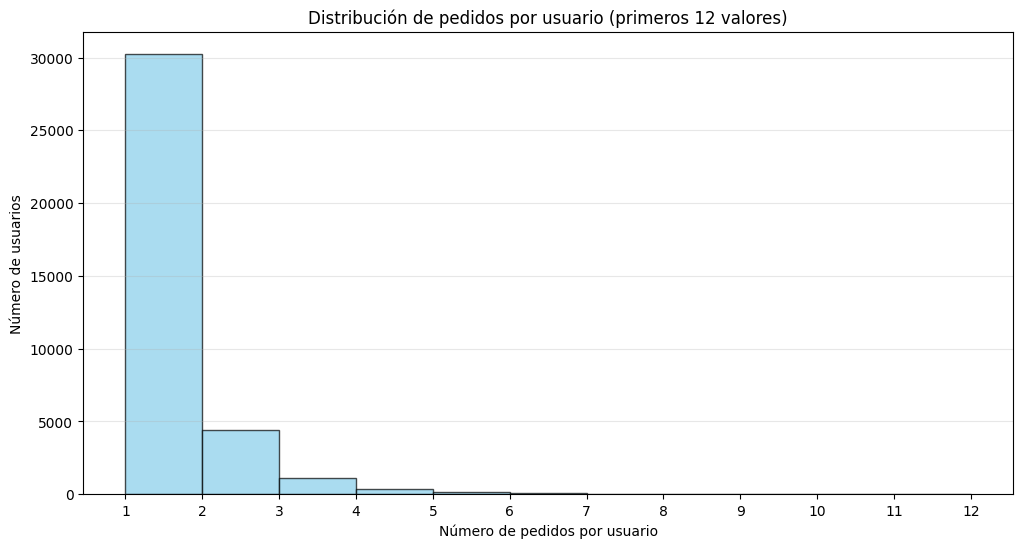

In [39]:
# Histograma de pedidos por usuario
plt.figure(figsize=(12, 6))
plt.hist(orders_per_user, bins=range(1, min(13, orders_per_user.max() + 2)), 
         edgecolor='black', alpha=0.7, color='skyblue')
plt.xlabel('Número de pedidos por usuario')
plt.ylabel('Número de usuarios')
plt.title('Distribución de pedidos por usuario (primeros 12 valores)')
plt.xticks(range(1, min(13, orders_per_user.max() + 1)))
plt.grid(axis='y', alpha=0.3)
plt.show()

In [40]:
# Análisis por períodos
# Compras por usuario por día
daily_purchases = orders.groupby(['date', 'Uid']).size()

# Compras por usuario por semana  
weekly_purchases = orders.groupby(['week', 'Uid']).size()

# Compras por usuario por mes
monthly_purchases = orders.groupby(['month', 'Uid']).size()

In [41]:
# Analizar la distribución de compras diarias
print("=== ANÁLISIS DE COMPRAS DIARIAS ===")
print("Estadísticas básicas:")
print(daily_purchases.describe())

print("\n=== DISTRIBUCIÓN DE COMPRAS POR DÍA ===")
daily_frequency = daily_purchases.value_counts().sort_index()
daily_percentage = (daily_frequency / len(daily_purchases) * 100).round(2)

for compras, casos in daily_frequency.head(10).items():
    porcentaje = daily_percentage[compras]
    print(f"{compras} compra(s) en un día: {casos:,} casos ({porcentaje}%)")

=== ANÁLISIS DE COMPRAS DIARIAS ===
Estadísticas básicas:
count    46548.000000
mean         1.083076
std          0.345233
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          9.000000
dtype: float64

=== DISTRIBUCIÓN DE COMPRAS POR DÍA ===
1 compra(s) en un día: 43,384 casos (93.2%)
2 compra(s) en un día: 2,660 casos (5.71%)
3 compra(s) en un día: 369 casos (0.79%)
4 compra(s) en un día: 91 casos (0.2%)
5 compra(s) en un día: 34 casos (0.07%)
6 compra(s) en un día: 4 casos (0.01%)
7 compra(s) en un día: 3 casos (0.01%)
8 compra(s) en un día: 2 casos (0.0%)
9 compra(s) en un día: 1 casos (0.0%)


In [42]:
# Analizar la distribución de compras semanales
print("=== ANÁLISIS DE COMPRAS SEMANALES ===")
print("Estadísticas básicas:")
print(weekly_purchases.describe())

print("\n=== DISTRIBUCIÓN DE COMPRAS POR SEMANA ===")
weekly_frequency = weekly_purchases.value_counts().sort_index()
weekly_percentage = (weekly_frequency / len(weekly_purchases) * 100).round(2)

for compras, casos in weekly_frequency.head(10).items():
    porcentaje = weekly_percentage[compras]
    print(f"{compras} compra(s) en una semana: {casos:,} casos ({porcentaje}%)")

=== ANÁLISIS DE COMPRAS SEMANALES ===
Estadísticas básicas:
count    43298.000000
mean         1.164372
std          0.714073
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         22.000000
dtype: float64

=== DISTRIBUCIÓN DE COMPRAS POR SEMANA ===
1 compra(s) en una semana: 38,972 casos (90.01%)
2 compra(s) en una semana: 3,210 casos (7.41%)
3 compra(s) en una semana: 551 casos (1.27%)
4 compra(s) en una semana: 212 casos (0.49%)
5 compra(s) en una semana: 117 casos (0.27%)
6 compra(s) en una semana: 82 casos (0.19%)
7 compra(s) en una semana: 50 casos (0.12%)
8 compra(s) en una semana: 22 casos (0.05%)
9 compra(s) en una semana: 24 casos (0.06%)
10 compra(s) en una semana: 16 casos (0.04%)


In [44]:
# Analizar la distribución de compras mensuales
print("=== ANÁLISIS DE COMPRAS MENSUALES ===")
print("Estadísticas básicas:")
print(monthly_purchases.describe())

print("\n=== DISTRIBUCIÓN DE COMPRAS POR MES ===")
monthly_frequency = monthly_purchases.value_counts().sort_index()
monthly_percentage = (monthly_frequency / len(monthly_purchases) * 100).round(2)

for compras, casos in monthly_frequency.head(10).items():
    porcentaje = monthly_percentage[compras]
    print(f"{compras} compra(s) en un mes: {casos:,} casos ({porcentaje}%)")

=== ANÁLISIS DE COMPRAS MENSUALES ===
Estadísticas básicas:
count    41019.000000
mean         1.229065
std          1.384665
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         67.000000
dtype: float64

=== DISTRIBUCIÓN DE COMPRAS POR MES ===
1 compra(s) en un mes: 36,303 casos (88.5%)
2 compra(s) en un mes: 3,511 casos (8.56%)
3 compra(s) en un mes: 629 casos (1.53%)
4 compra(s) en un mes: 190 casos (0.46%)
5 compra(s) en un mes: 92 casos (0.22%)
6 compra(s) en un mes: 48 casos (0.12%)
7 compra(s) en un mes: 35 casos (0.09%)
8 compra(s) en un mes: 30 casos (0.07%)
9 compra(s) en un mes: 23 casos (0.06%)
10 compra(s) en un mes: 16 casos (0.04%)


### Tamaño promedio de compra

In [45]:
# Calcular el tamaño promedio de compra
revenue_total = orders['Revenue'].sum()
total_orders = len(orders)
average_order_value = revenue_total / total_orders

print(f"Ingresos totales: ${revenue_total:,.2f}")
print(f"Total de pedidos: {total_orders:,}")
print(f"Tamaño promedio de compra: ${average_order_value:.2f}")

Ingresos totales: $252,057.20
Total de pedidos: 50,415
Tamaño promedio de compra: $5.00


In [47]:
# Distribución de valores de compra
orders['Revenue'].describe()

# Ver los valores más comunes
orders['Revenue'].value_counts().head(10)

1.83    2552
2.44    2464
3.67    2421
1.22    2216
3.05    2041
4.89    1664
0.61    1312
4.28    1235
6.11    1164
7.33    1150
Name: Revenue, dtype: int64

**Interpretación clave**
- Productos de bajo costo: \$5.00 promedio sugiere entrada económicas o productos digitales.
- Precios estandarizados: Los valores más comunes $ (1.83,2.44,3.67) sugieren categorías de precios fijas.
- Mercado accesible: Precios bajos facilitan compras impulsivas.

### LTV

In [49]:
ltv = orders.groupby('Uid')['Revenue'].sum().mean()
ltv

6.901327930345262

In [50]:
# Identificar la primera compra de cada usuario
first_purchase = orders.groupby('Uid')['Buy Ts'].min().reset_index()
first_purchase.columns = ['Uid', 'first_purchase_date']

# Crear el mes de cohorte (primera compra)
first_purchase['cohort_month'] = first_purchase['first_purchase_date'].dt.to_period('M')

print("Primeras 5 cohortes:")
print(first_purchase.head())

Primeras 5 cohortes:
                Uid first_purchase_date cohort_month
0   313578113262317 2018-01-03 21:51:00      2018-01
1  1575281904278712 2017-06-03 10:13:00      2017-06
2  2429014661409475 2017-10-11 18:33:00      2017-10
3  2464366381792757 2018-01-28 15:54:00      2018-01
4  2551852515556206 2017-11-24 10:14:00      2017-11


In [52]:
from operator import attrgetter
# Unir datos de primera compra con todas las órdenes
orders_cohort = orders.merge(first_purchase[['Uid', 'cohort_month']], on='Uid')

# Crear período de compra para cada orden
orders_cohort['purchase_period'] = orders_cohort['Buy Ts'].dt.to_period('M')

# Calcular los meses desde la primera compra
orders_cohort['period_number'] = (
    orders_cohort['purchase_period'] - orders_cohort['cohort_month']
).apply(attrgetter('n'))

print("Datos preparados para análisis de cohortes:")
print(orders_cohort[['Uid', 'Revenue', 'cohort_month', 'period_number']].head())

Datos preparados para análisis de cohortes:
                    Uid  Revenue cohort_month  period_number
0  10329302124590727494    17.00      2017-06              0
1  11627257723692907447     0.55      2017-06              0
2  17903680561304213844     0.37      2017-06              0
3  16109239769442553005     0.55      2017-06              0
4  14200605875248379450     0.37      2017-06              0


In [53]:
# Calcular ingresos acumulados por cohorte y período
cohort_data = orders_cohort.groupby(['cohort_month', 'period_number'])['Revenue'].sum().reset_index()

# Crear tabla pivote para visualizar mejor
cohort_table = cohort_data.pivot(index='cohort_month', 
                                columns='period_number', 
                                values='Revenue').fillna(0)

print("Tabla de ingresos por cohorte y período:")
print(cohort_table.head())

Tabla de ingresos por cohorte y período:
period_number        0        1        2         3        4        5   \
cohort_month                                                            
2017-06         9557.49   981.82   885.34   1931.30  2068.58  1487.92   
2017-07        11557.65   644.61  1199.05    690.31   339.97   300.08   
2017-08         7228.83   646.63   628.12    536.05   676.85   388.45   
2017-09        14568.53  2884.49  1344.52  10261.52  1033.84  1670.08   
2017-10        21716.20  2325.21   830.65    682.01   657.77   522.37   

period_number       6        7        8        9        10      11  
cohort_month                                                        
2017-06        1922.74  1176.56  1119.15  1225.51  1155.66  519.62  
2017-07         231.16   272.72   310.05   282.96   299.36    0.00  
2017-08         288.61   554.86   400.33   257.53     0.00    0.00  
2017-09        1810.85   627.57   474.92     0.00     0.00    0.00  
2017-10         368.10   501.14  

In [54]:
# Calcular ingresos acumulados (LTV creciente)
cohort_cumulative = cohort_table.cumsum(axis=1)

print("LTV acumulado por cohorte:")
print(cohort_cumulative.head())

LTV acumulado por cohorte:
period_number        0         1         2         3         4         5   \
cohort_month                                                                
2017-06         9557.49  10539.31  11424.65  13355.95  15424.53  16912.45   
2017-07        11557.65  12202.26  13401.31  14091.62  14431.59  14731.67   
2017-08         7228.83   7875.46   8503.58   9039.63   9716.48  10104.93   
2017-09        14568.53  17453.02  18797.54  29059.06  30092.90  31762.98   
2017-10        21716.20  24041.41  24872.06  25554.07  26211.84  26734.21   

period_number        6         7         8         9         10        11  
cohort_month                                                               
2017-06        18835.19  20011.75  21130.90  22356.41  23512.07  24031.69  
2017-07        14962.83  15235.55  15545.60  15828.56  16127.92  16127.92  
2017-08        10393.54  10948.40  11348.73  11606.26  11606.26  11606.26  
2017-09        33573.83  34201.40  34676.32  34676.32

In [56]:
# Contar usuarios únicos por cohorte
cohort_sizes = first_purchase.groupby('cohort_month')['Uid'].nunique()

print("Tamaño de cada cohorte:")
print(cohort_sizes)

Tamaño de cada cohorte:
cohort_month
2017-06    2023
2017-07    1923
2017-08    1370
2017-09    2581
2017-10    4340
2017-11    4081
2017-12    4383
2018-01    3373
2018-02    3651
2018-03    3533
2018-04    2276
2018-05    2988
2018-06       1
Freq: M, Name: Uid, dtype: int64


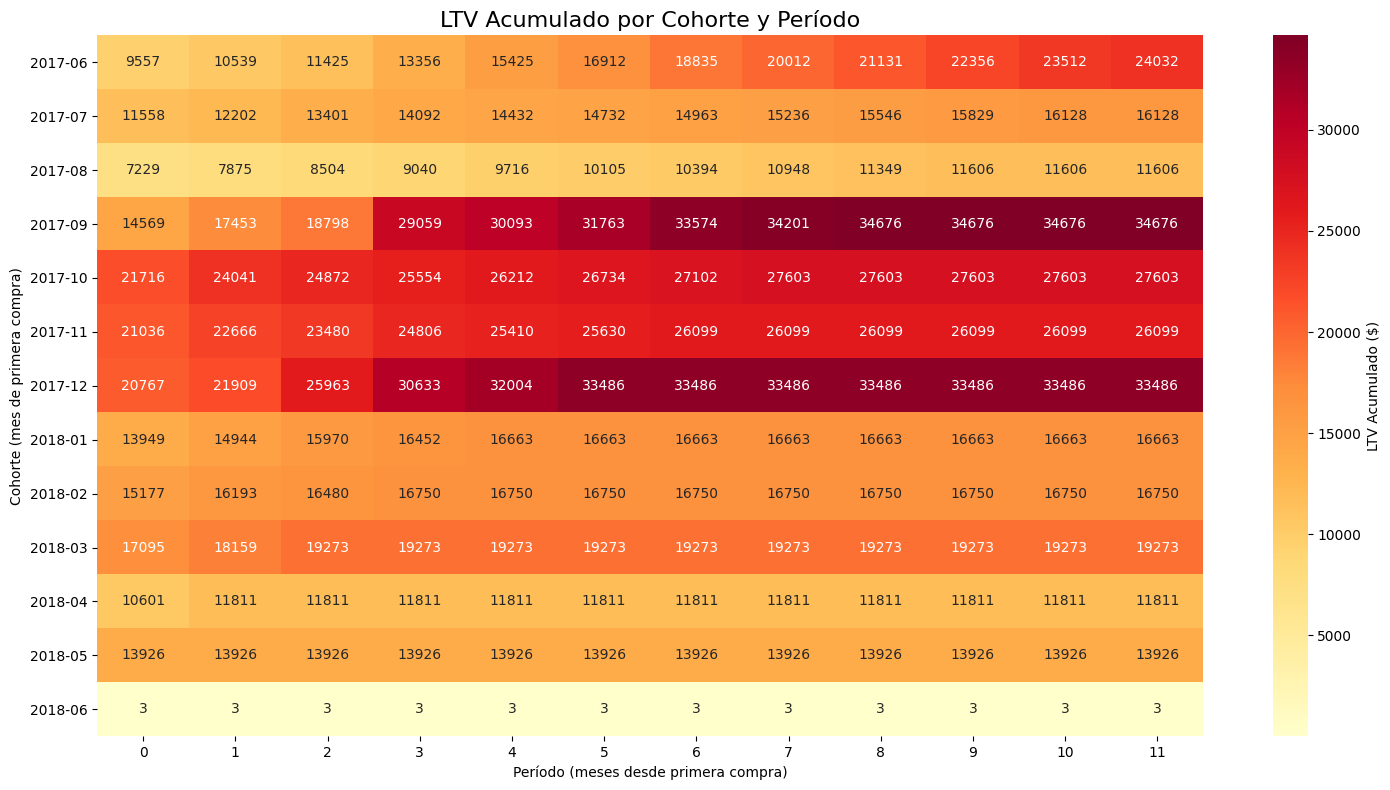

In [57]:
import seaborn as sns

# Crear mapa de calor del LTV acumulado
plt.figure(figsize=(15, 8))
sns.heatmap(cohort_cumulative, 
            annot=True, 
            fmt='.0f', 
            cmap='YlOrRd',
            cbar_kws={'label': 'LTV Acumulado ($)'})
plt.title('LTV Acumulado por Cohorte y Período', fontsize=16)
plt.xlabel('Período (meses desde primera compra)')
plt.ylabel('Cohorte (mes de primera compra)')
plt.tight_layout()
plt.show()

Este mapa muestra el valor total generado por cada cohorte a lo largo del tiempo:
- Cohortes más valiosas: Las cohortes de semptiembre y octubre 2017 generaron los mayores ingresos totales.
- Crecimiento temporal: Los valores aumentan de izquierda a derecha, mostrando cómo se acumula el valor
- Estacionalidad: Las cohortes de otoño/invierno (sept-dic) tienden a ser más valiosas

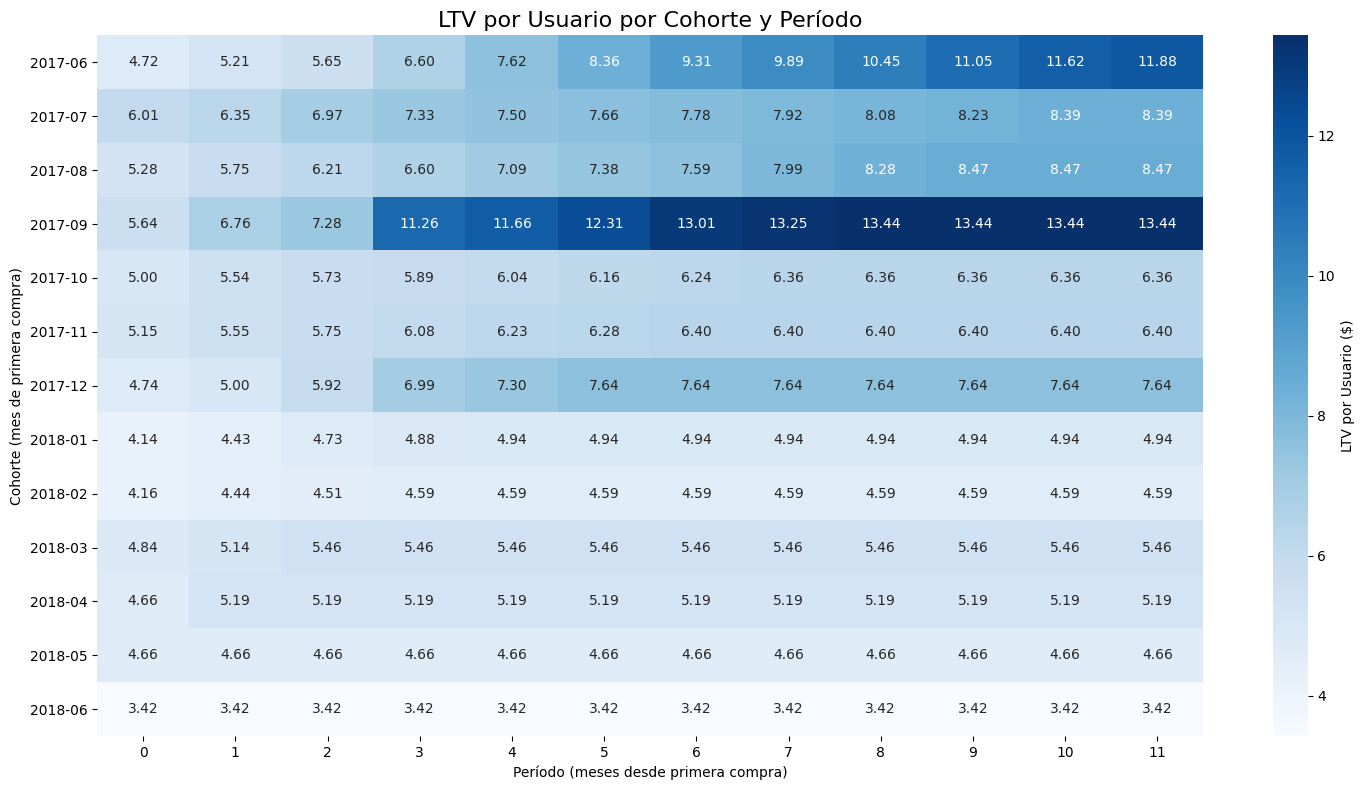

In [58]:
# Calcular LTV por usuario por cohorte
ltv_per_user = cohort_cumulative.div(cohort_sizes, axis=0)

plt.figure(figsize=(15, 8))
sns.heatmap(ltv_per_user, 
            annot=True, 
            fmt='.2f', 
            cmap='Blues',
            cbar_kws={'label': 'LTV por Usuario ($)'})
plt.title('LTV por Usuario por Cohorte y Período', fontsize=16)
plt.xlabel('Período (meses desde primera compra)')
plt.ylabel('Cohorte (mes de primera compra)')
plt.tight_layout()
plt.show()

Este es el más importante para decisiones de marketing:
- Cada número representa cuánto dinero genera un usuario promedio de esa cohorte después de X meses
- Cohortes premium: Septiembre 2017 tiene el LTV más alto (\$13.43 por usuario)
- Estabilización: La mayoría de cohortes se estabilizan entre $7-10 por usuario
- Tiempo de maduración: El LTV crece principalmente en los primeros 3-4 meses

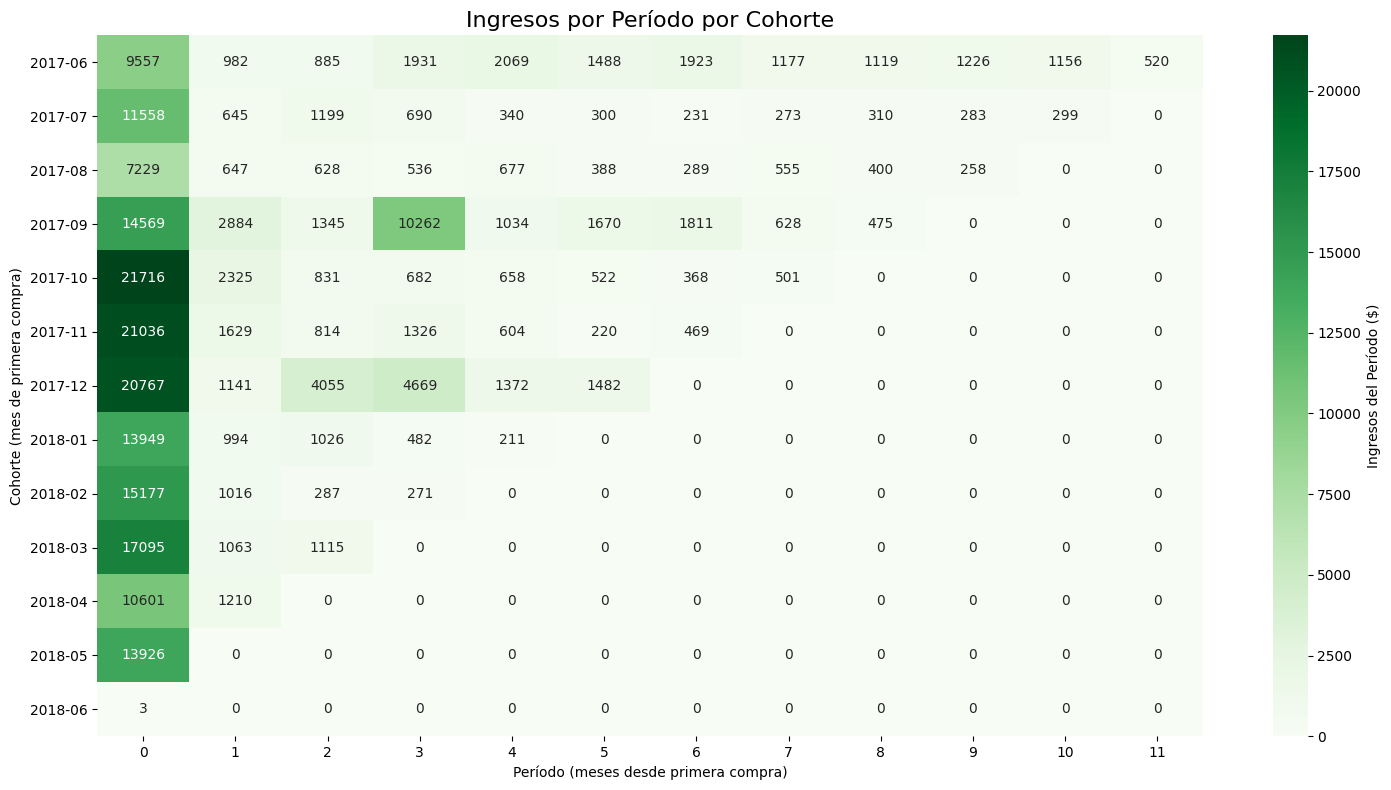

In [59]:
# Crear mapa de calor de ingresos por período (no acumulados)
plt.figure(figsize=(15, 8))
sns.heatmap(cohort_table, 
            annot=True, 
            fmt='.0f', 
            cmap='Greens',
            cbar_kws={'label': 'Ingresos del Período ($)'})
plt.title('Ingresos por Período por Cohorte', fontsize=16)
plt.xlabel('Período (meses desde primera compra)')
plt.ylabel('Cohorte (mes de primera compra)')
plt.tight_layout()
plt.show()

Este mapa muestra la actividad mes a mes.
- Periodo 0: Siempre es el más alto (compra inicial)
- Retención: Los valores posteriores muestran qué tan activos siguen los usuarios
- Declive natural: Los ingresos disminuyen con el tiempo, confirmando el patrón de "compra única"

## Análisis de Marketing

### Inversión de Marketing

In [61]:
#Calcular gasto total
gasto_total = costs['costs'].sum()
print(f"Gasto total en marketing: ${gasto_total:,.2f}")

Gasto total en marketing: $329,131.62


In [63]:
# Calcular gasto por fuente
gasto_por_fuente = costs.groupby('source_id')['costs'].sum().sort_values(ascending=False)
print("Gasto por fuente de adquisición:")
print(gasto_por_fuente)

Gasto por fuente de adquisición:
source_id
3     141321.63
4      61073.60
5      51757.10
2      42806.04
1      20833.27
10      5822.49
9       5517.49
Name: costs, dtype: float64


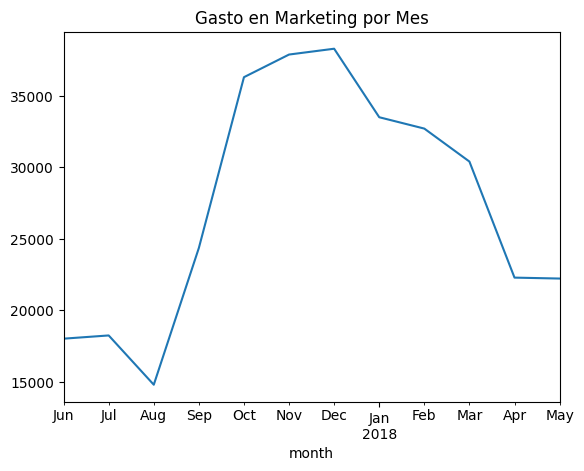

In [64]:
# Gasto diario
costs['dt'] = pd.to_datetime(costs['dt'])
gasto_diario = costs.groupby('dt')['costs'].sum()

# Gasto mensual
costs['month'] = costs['dt'].dt.to_period('M')
gasto_mensual = costs.groupby('month')['costs'].sum()

# Visualizar
gasto_mensual.plot(title='Gasto en Marketing por Mes')
plt.show()

### CAC

In [67]:
# Gasto total por fuente
gasto_por_fuente = costs.groupby('source_id')['costs'].sum()

# Usuarios únicos por fuente
usuarios_por_fuente = visits.groupby('Source Id')['Uid'].nunique()

# Combinar ambos datos
cac_data = pd.DataFrame({
    'gasto_total': gasto_por_fuente,
    'usuarios_adquiridos': usuarios_por_fuente
}).fillna(0)

# Calcular CAC
cac_data['CAC'] = cac_data['gasto_total'] / cac_data['usuarios_adquiridos']

print("CAC por fuente de adquisición:")
print(cac_data.sort_values('CAC'))

CAC por fuente de adquisición:
    gasto_total  usuarios_adquiridos       CAC
6          0.00                    6  0.000000
7          0.00                   34  0.000000
9       5517.49                 9264  0.595584
10      5822.49                 8067  0.721766
4      61073.60                83525  0.731201
5      51757.10                56974  0.908434
1      20833.27                18999  1.096546
2      42806.04                26245  1.631017
3     141321.63                74756  1.890439


Mirando los resultados del CAC por fuente se puede observar que hay fuentes muy eficientes como 6 y 7, que podrían ser organicas.

Considerando que el LTV promedio es de $6.90 estas fuentes definitivamente seguirían siendo eficientes.

### ROMI

In [72]:
ROMI = (revenue_total - gasto_total) / gasto_total * 100
print(f'ROMI: {ROMI}%')

ROMI: -23.41750695360112%


**ROMI negativo: Se está gastando más de lo que genera Showz ❌**

In [73]:
# Conectar visitas con órdenes para obtener ingresos por fuente
visits_orders = visits.merge(orders, on='Uid', how='inner')

# Calcular ingresos totales por fuente
ingresos_por_fuente = visits_orders.groupby('Source Id')['Revenue'].sum()
print("Ingresos por fuente de adquisición:")
print(ingresos_por_fuente.sort_values(ascending=False))

Ingresos por fuente de adquisición:
Source Id
2     2.638189e+06
1     2.298200e+06
5     1.181477e+06
4     4.966902e+05
3     2.966880e+05
9     3.634225e+04
10    1.461923e+04
7     1.220000e+00
Name: Revenue, dtype: float64


In [74]:
# Crear DataFrame con todos los datos necesarios
romi_data = pd.DataFrame({
    'gasto_total': gasto_por_fuente,
    'ingresos_generados': ingresos_por_fuente,
    'usuarios_adquiridos': usuarios_por_fuente
}).fillna(0)

# Calcular ROMI por fuente
romi_data['ROMI'] = ((romi_data['ingresos_generados'] - romi_data['gasto_total']) / romi_data['gasto_total'] * 100)

# Mostrar resultados ordenados por ROMI
print("ROMI por fuente de adquisición:")
print(romi_data.sort_values('ROMI', ascending=False))

ROMI por fuente de adquisición:
    gasto_total  ingresos_generados  usuarios_adquiridos          ROMI
7          0.00        1.220000e+00                   34           inf
1      20833.27        2.298200e+06                18999  1.093139e+04
2      42806.04        2.638189e+06                26245  6.063124e+03
5      51757.10        1.181477e+06                56974  2.182734e+03
4      61073.60        4.966902e+05                83525  7.132649e+02
9       5517.49        3.634225e+04                 9264  5.586736e+02
10      5822.49        1.461923e+04                 8067  1.510821e+02
3     141321.63        2.966880e+05                74756  1.099381e+02
6          0.00        0.000000e+00                    6           NaN


## Conclusiones y recomendaciones

Basandome en el análisis exploratorio, recomendaría priorizar estaas fuentes en orden:
1. Fuentes 7, 1, 2 y 5
2. Fuente 4
3. Evitar o reducir fuentes 3, 9 y 10

En las métricas que me enfoque para tomar las decisiones de inversión publicitaria son las siguientes:
1. ROMI: porque es crucial, dice si cada peso invertido genera ganancia. En este caso las fuentes 7, 1, 2 y 5 tienen ROMI alto!
2. CAC: porque mide cuánto cuesta adquirir cada cliente. Las fuentes 6, 7, 9 y 10 tienen un CAC muy bajo.
3. Volumen de usuarios adquiridos: porque evalúa la escalabilidad de cada fuente. La fuente 4 tiene alto volumen.

**Conclusiones**
- Conclusión 1: Fuentes orgánicas/gratuitas son oro. Aunque el volumen es bajo, la rentabilidad es infinita. Fuentes 6 y 7 CAC = $0 (probablemente tráfico orgánico)
- Conclusión 2: Fuentes pagadas premium. Estas fuentes generan usuarios de alta calidad que compran mucho
- Conclusión 3: Fuente 3 es problemática. Mayor gasto pero de ROMI solo 110%. CAC alto vs LTV bajo = margen estrecho.

**Recomendaciones**
- Maximizar inversión en fuentes 1, 2, 5 (alta rentabilidad)
- Optimizar fuente 4 (buen volumen, mejorar conversión)
- Reducir/pausar fuente 3 hasta optimizar
- Investigar cómo escalar fuentes 6 y 7 (orgánicas)

**Recomendaciones extras**

Períodos de alta demanda (Sep-Dic):
- Hipótesis: Durante las fechas decembrinas, la demanda orgánica es alta, por lo que el CAC (Costo de Adquisición de Cliente) podría ser más bajo.
- Estrategia potencial: Aumentar inversión para capitalizar la alta intención de compra.

Período de baja demanda (Febrero):
- Hipótesis: Después del gasto navideño, los usuarios son más sensibles al precio.
- Estrategia potencial: Reducir inversión o enfocar en ofertas/descuentos.